<a href="https://colab.research.google.com/github/fabiodemo/Yolov8/blob/master/aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing the Required Libraries**

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Tue Sep  5 09:54:34 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060         On | 00000000:09:00.0 Off |                  N/A |
|  0%   47C    P5               18W / 170W|    491MiB / 12288MiB |      9%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
HOME = os.getcwd()

In [7]:
print(HOME)

/home/fabio/Documents/Github/Yolov8/Aula_2


#**Installing Ultralytics using Pip Install**

In [9]:
# !pip install ultralytics==8.0.0

##Checking whether YOLOv8 is Installed and its working Fine

In [8]:
import ultralytics

In [9]:
ultralytics.checks()

Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
Setup complete ✅ (8 CPUs, 23.4 GB RAM, 3.3/29.8 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [9]:
!mkdir {HOME}/datasets


In [10]:
!pwd

/home/fabio/Documents/Github/Yolov8/Aula_2


In [11]:
%cd {HOME}/datasets


/home/fabio/Documents/Github/Yolov8/Aula_2/datasets


In [12]:
!pwd

/home/fabio/Documents/Github/Yolov8/Aula_2/datasets


In [13]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/77/1c/b6a244353965f74b3dad9c2a8726856d3e0eeb3e2e5c9e65e56dc6e7188b/roboflow-1.1.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.7 MB/s eta 0:00:002.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 23.5 MB/s eta 0:00:00
  Obtaining dependency information for supervision from https://files.pythonhosted.org/packages/38/31/19d39cde7723206ecc1e054d16c792204a76ab884fefa656ea297b26af9e/supervision-0.14.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 112.6 MB/s eta 0:00:00
  Obtaining dependency information for opencv-python-headless<5.0.0.0,>=4.8.0.74 from https://files.pythonhosted.org/packages/21/6d/a

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key="IY7ESBtovhbLtT6jYb04")
project = rf.workspace("moinfaisal").project("potholes-detection-yolonas")
dataset = project.version(5).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to potholes-detection-yolonas-5 in yolov5pytorch:: 100%|██████████| 3172/3172 [00:00<00:00, 6412.60it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [15]:
%cd {HOME}

/home/fabio/Documents/Github/Yolov8/Aula_2


In [16]:
%cd {dataset.location}

/home/fabio/Documents/Github/Yolov8/Aula_2/datasets/potholes-detection-yolonas-5


In [22]:
!yolo task=detect mode=train model=yolov8l.pt data=/home/fabio/Documents/Github/Yolov8/Aula_2/potholes-detection-yolonas-5/data.yaml epochs=160 imgsz=640

Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12042MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/fabio/Documents/Github/Yolov8/Aula_2/potholes-detection-yolonas-5/data.yaml, epochs=160, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, 

In [25]:
!ls {HOME}/datasets/potholes-detection-yolonas-5/train

images	labels	labels.cache


In [ ]:
!rm -rf /content/runs

In [ ]:
!pip install unrar

In [ ]:
!unrar x /content/runs.part1.rar  /content/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/runs.part1.rar

Creating    /content/runs                                             OK
Creating    /content/runs/detect                                      OK
Creating    /content/runs/detect/train                                OK
Extracting  /content/runs/detect/train/args.yaml                           0%  OK 
Creating    /content/runs/detect/train2                               OK
Extracting  /content/runs/detect/train2/args.yaml                          0%  OK 
Creating    /content/runs/detect/train3                               OK
Extracting  /content/runs/detect/train3/args.yaml                          0%  OK 
Creating    /content/runs/detect/train4                               OK
Extracting  /content/runs/detect/train4/args.yaml                          0%  OK 
Extracting  /content/runs/detect/train4/confusion_matrix.png             

In [ ]:
!zip -r /content/backup.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2023.08.24/ (stored 0%)
  adding: content/.config/logs/2023.08.24/21.25.35.723493.log (deflated 56%)
  adding: content/.config/logs/2023.08.24/21.23.44.598291.log (deflated 91%)
  adding: content/.config/logs/2023.08.24/21.24.28.892496.log (deflated 58%)
  adding: content/.config/logs/2023.08.24/21.25.34.842300.log (deflated 57%)
  adding: content/.config/logs/2023.08.24/21.25.07.624486.log (deflated 58%)
  adding: content/.config/logs/2023.08.24/21.24.55.354132.log (deflated 86%)
  adding: content/.config/.last_update_check.json (deflated 23%)
 

#**Displaying the Confusion Matrix**

/home/fabio/Documents/Github/Yolov8/Aula_2


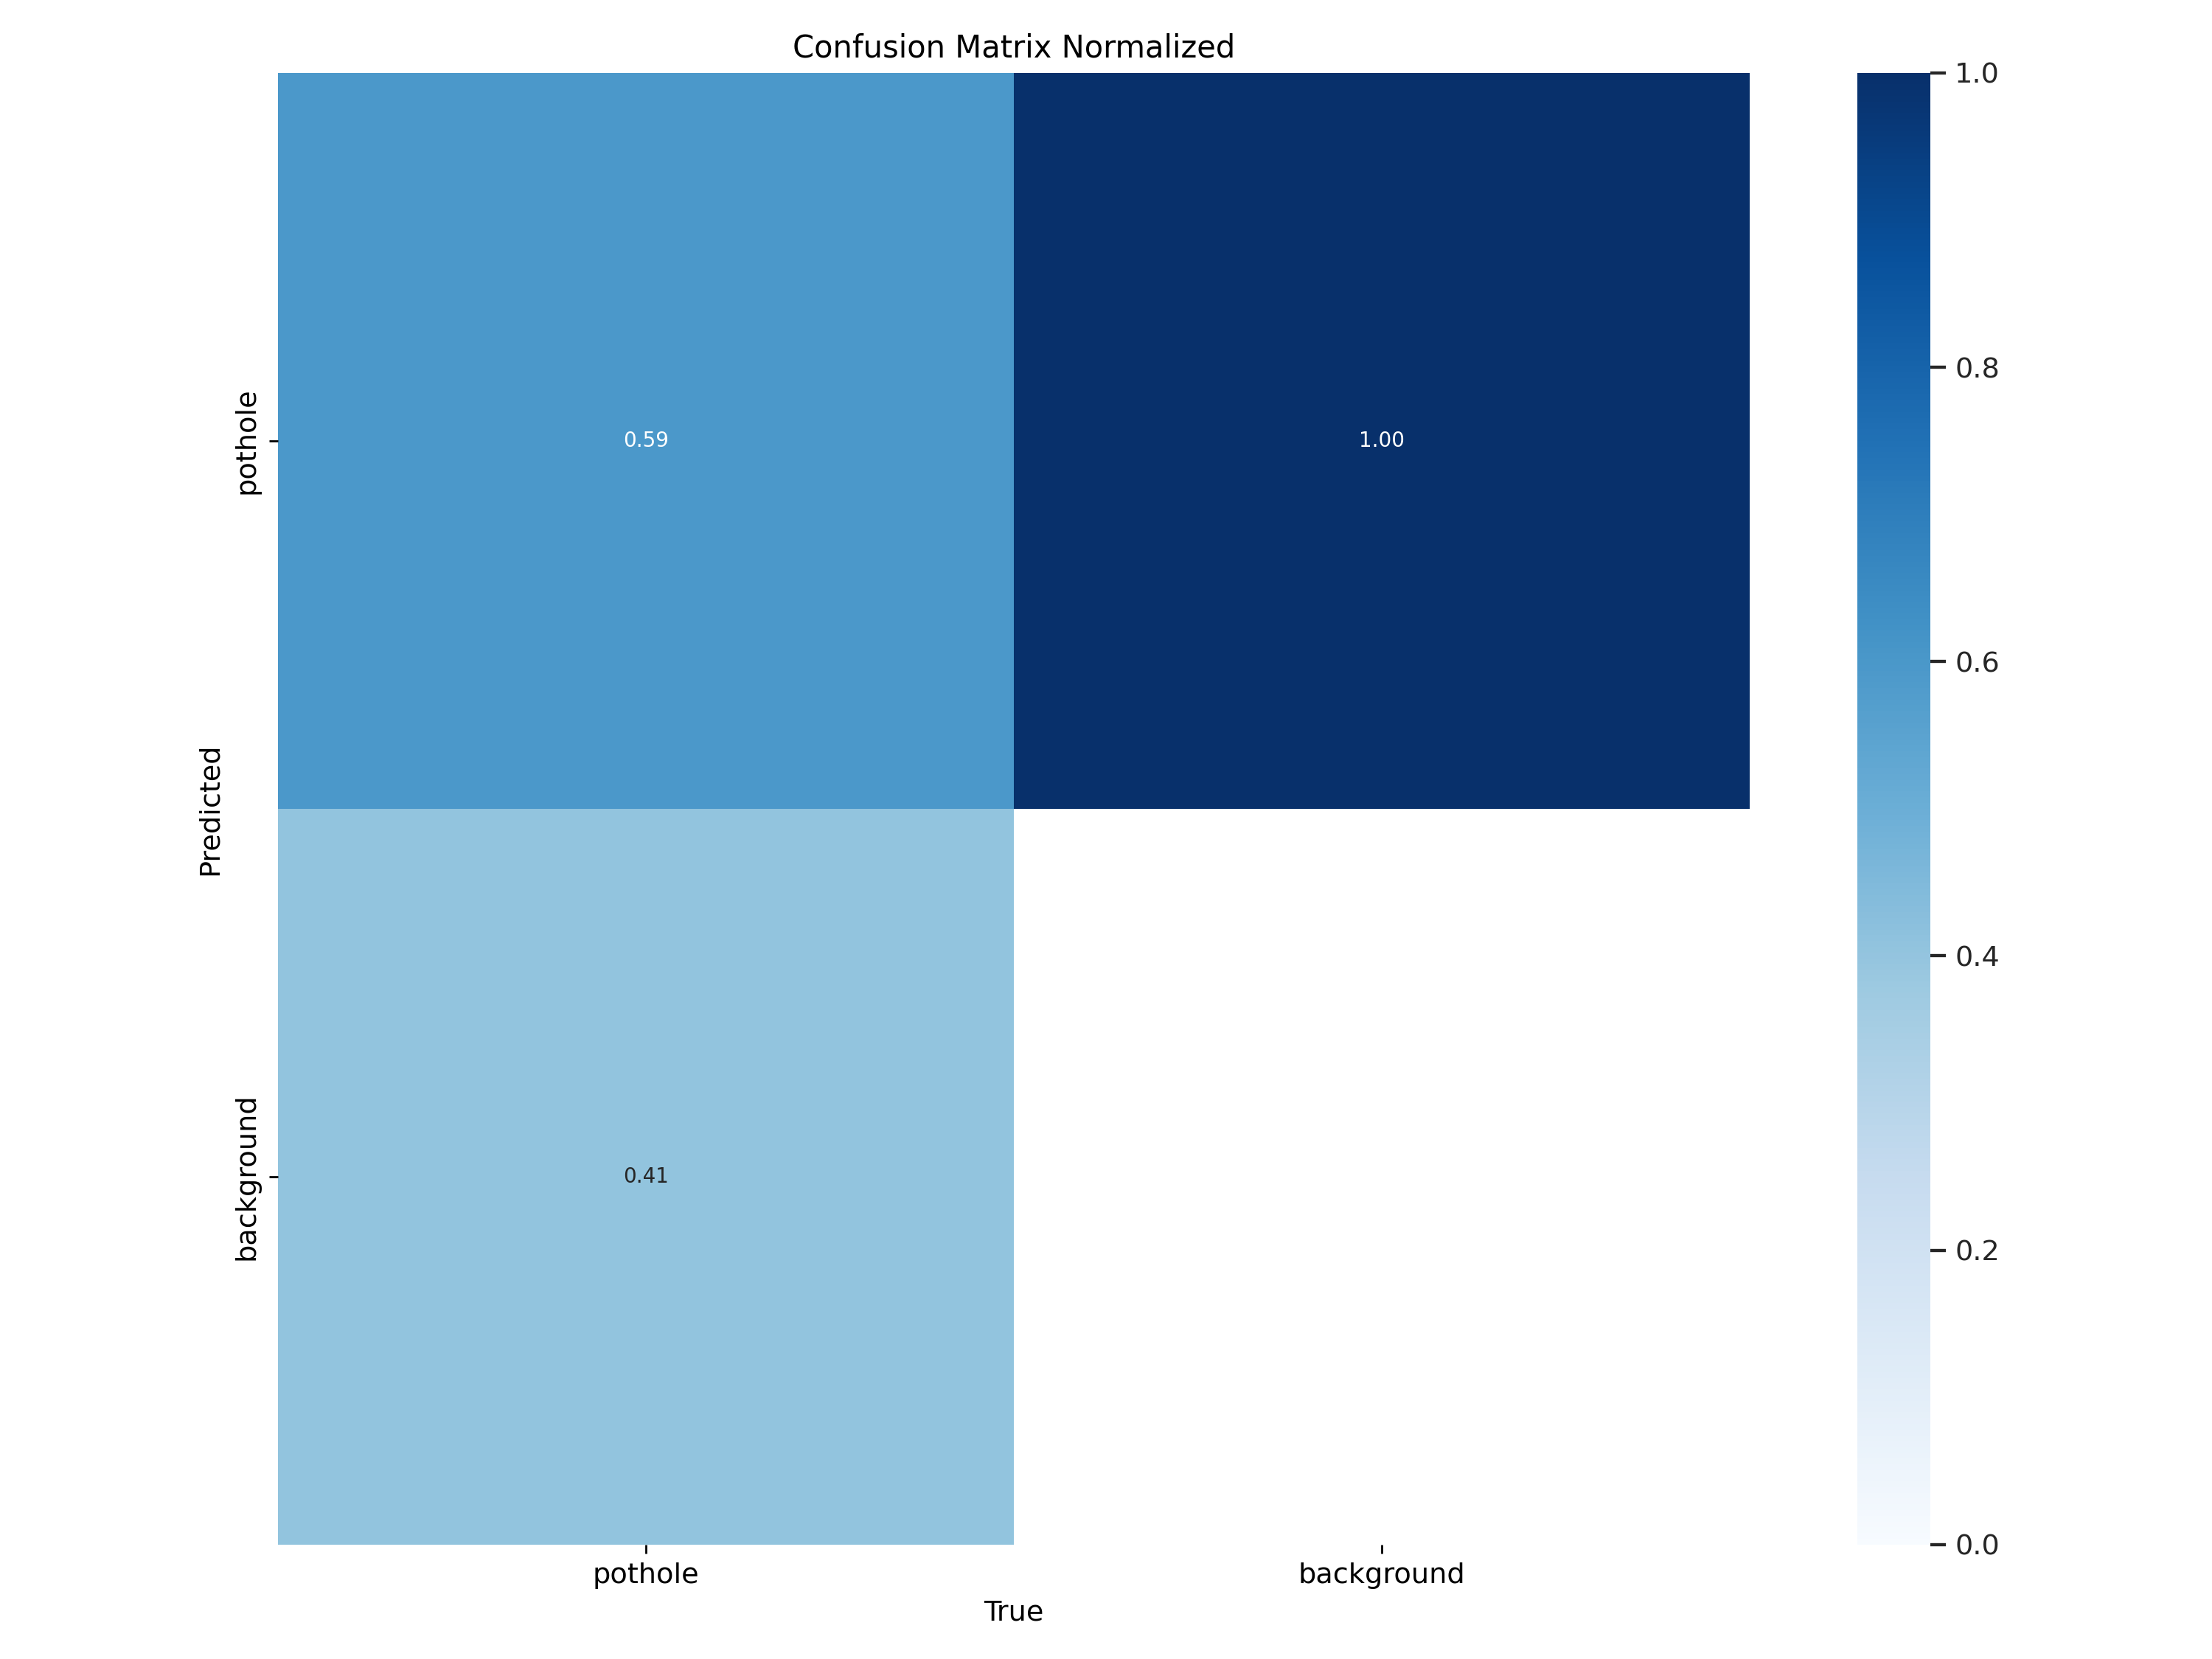

In [26]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'/home/fabio/Documents/Github/Yolov8/Aula_2/runs/detect/val4/confusion_matrix_normalized.png', width=900)

#**Training and Validation Loss**

/home/fabio/Documents/Github/Yolov8/Aula_2


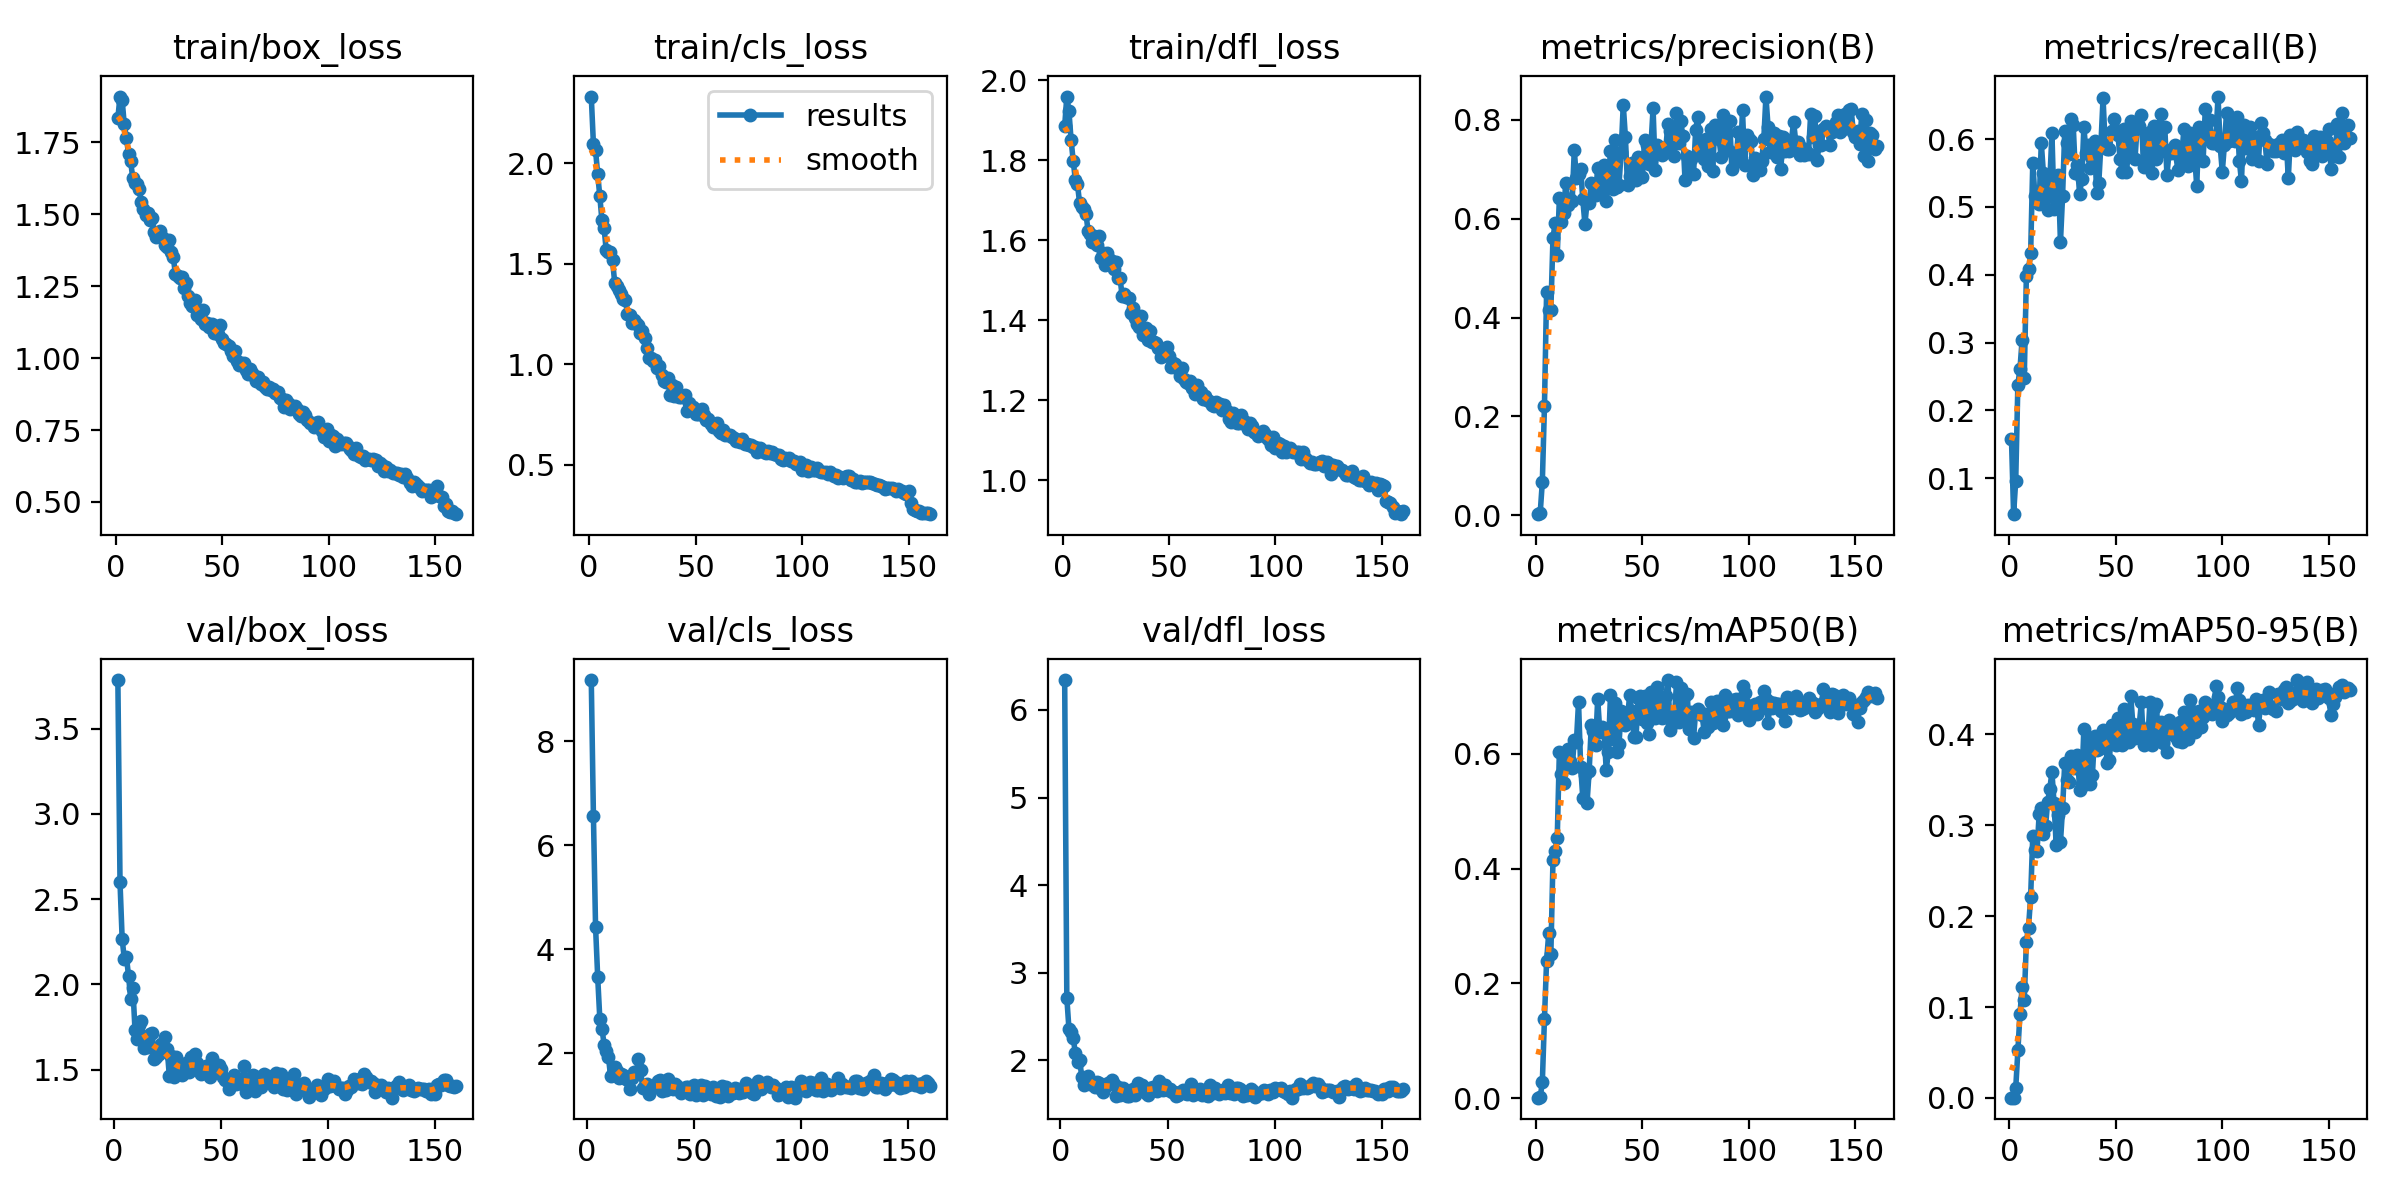

In [23]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'/home/fabio/Documents/Github/Yolov8/Aula_2/datasets/potholes-detection-yolonas-5/runs/detect/train6/results.png', width=600)

/home/fabio/Documents/Github/Yolov8/Aula_2


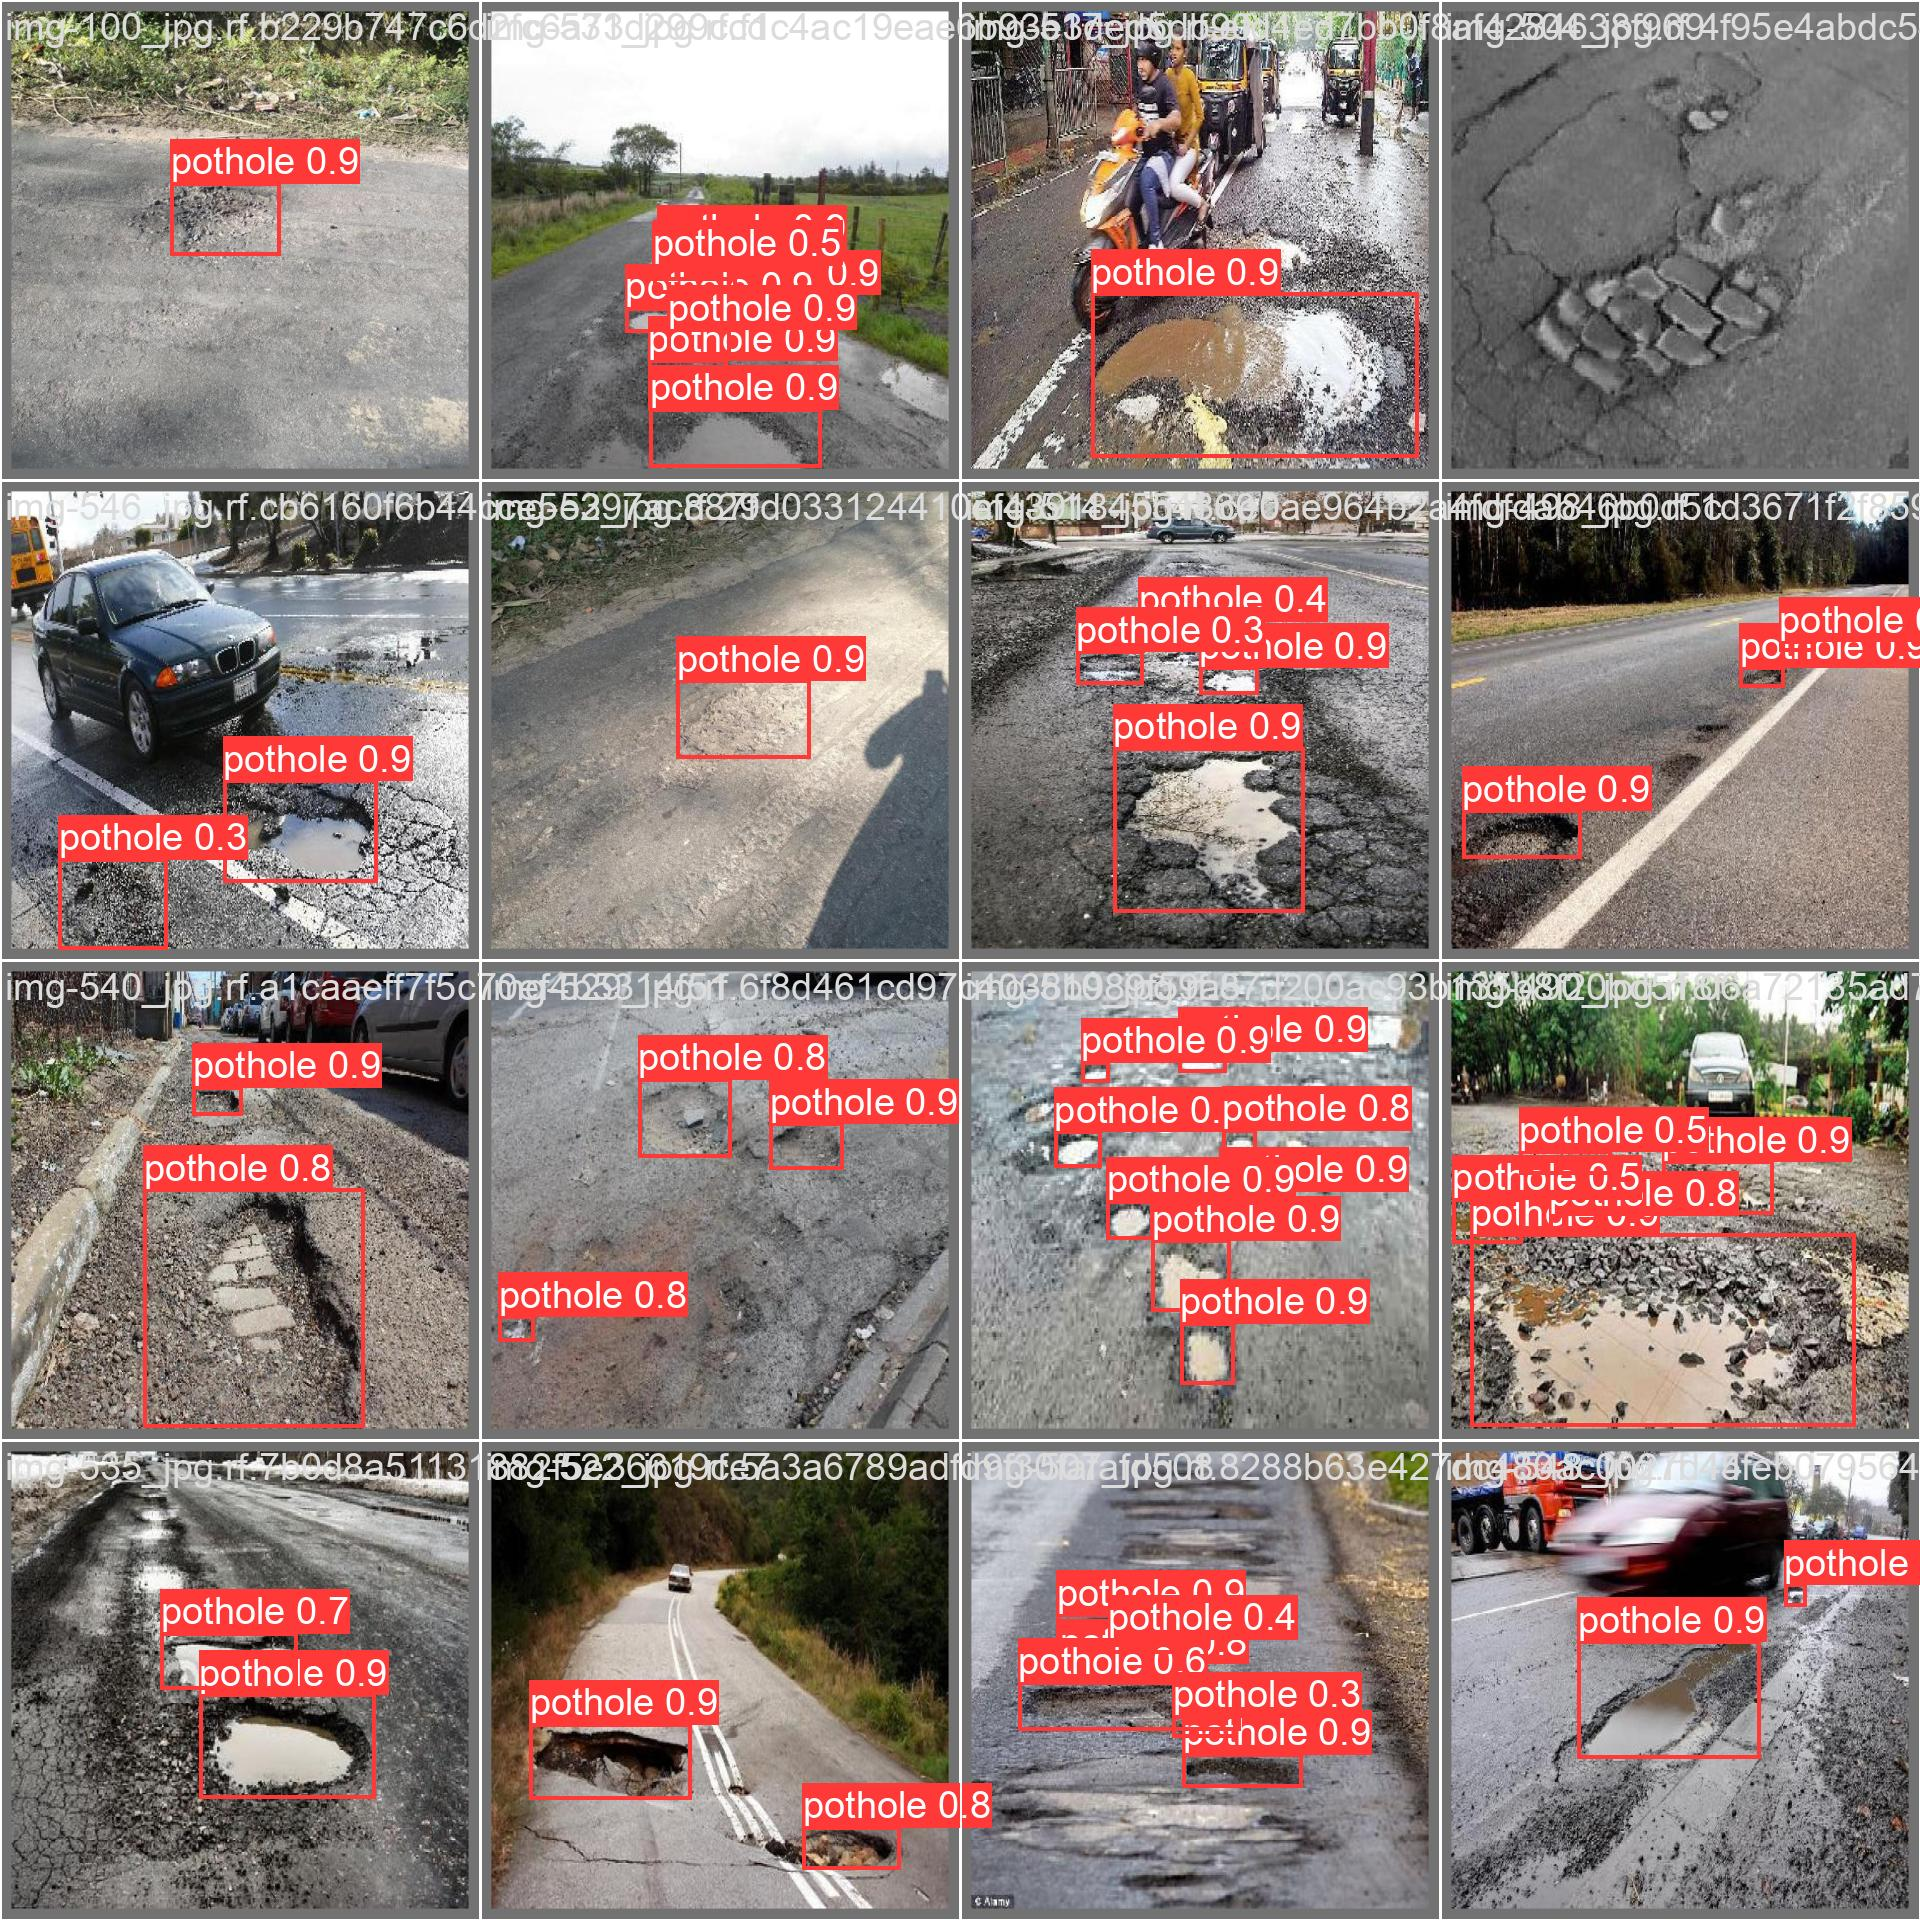

In [31]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val4/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [18]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used beforew

%cd {HOME}

!yolo task=detect mode=val model={HOME}/datasets/potholes-detection-yolonas-5/runs/detect/train6/weights/best.pt data=/home/fabio/Documents/Github/Yolov8/Aula_2/datasets/potholes-detection-yolonas-5/data.yaml

/home/fabio/Documents/Github/Yolov8/Aula_2
Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients
val: Scanning /home/fabio/Documents/Github/Yolov8/Aula_2/datasets/potholes-detec
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        135        424      0.788      0.611      0.715       0.46
Speed: 1.3ms preprocess, 27.1ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val4


#**Inference with Custom Model**

In [25]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/potholes-detection-yolonas-5/runs/detect/train6/weights/best.pt conf=0.25 source=/content/datasets/potholes-detection-yolonas-5/test/images

/home/fabio/Documents/Github/Yolov8/Aula_2


Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

Traceback (most recent call last):
  File "/home/fabio/mambaforge/envs/yolo/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/fabio/mambaforge/envs/yolo/lib/python3.9/site-packages/ultralytics/cfg/__init__.py", line 446, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/home/fabio/mambaforge/envs/yolo/lib/python3.9/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/home/fabio/mambaforge/envs/yolo/lib/python3.9/site-packages/ultralytics/engine/model.py", line 238, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/home/fabio/mambaforge/envs/yolo/lib/python3.9/site-packages/ultralytics/engine/predictor.py", line 199, 

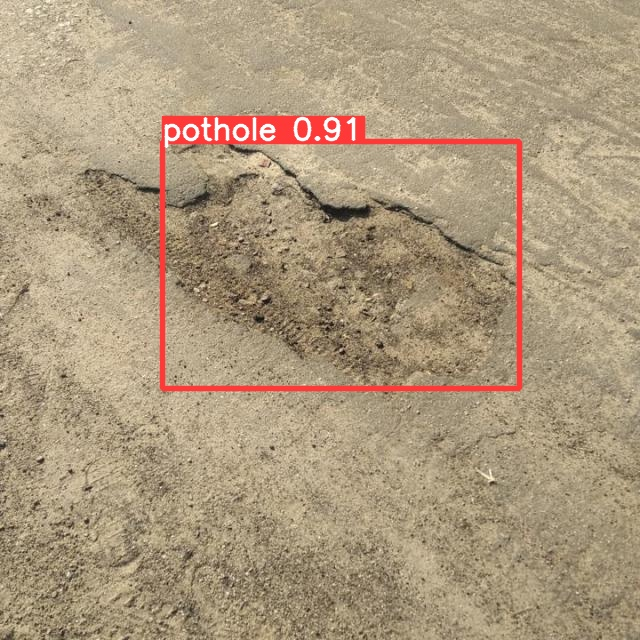

In [ ]:
Image("/content/runs/detect/predict2/img-113_jpg.rf.46d2fd7e9cde20708bd71397f29511ce.jpg")

#**Testing on a Demo Video**

In [38]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for soupsieve>1.2 from https://files.pythonhosted.org/packages/4c/f3/038b302fdfbe3be7da016777069f26ceefe11a681055ea1f7817546508e3/soupsieve-2.5-py3-none-any.whl.metadata


In [41]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4
100%|██████████████████████████████████████| 4.39M/4.39M [00:00<00:00, 7.39MB/s]


In [48]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/datasets/potholes-detection-yolonas-5/runs/detect/train6/weights/best.pt conf=0.25 source='demo.mp4'

/home/fabio/Documents/Github/Yolov8/Aula_2
Ultralytics YOLOv8.0.170 🚀 Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12037MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

video 1/1 (1/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 2 potholes, 188.2ms
video 1/1 (2/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 1 pothole, 21.0ms
video 1/1 (3/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 3 potholes, 19.2ms
video 1/1 (4/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 2 potholes, 20.0ms
video 1/1 (5/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 2 potholes, 21.2ms
video 1/1 (6/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 2 potholes, 20.4ms
video 1/1 (7/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 3 potholes, 21.4ms
video 1/1 (8/324) /home/fabio/Documents/Github/Yolov8/Aula_2/demo.mp4: 384x640 3 potholes, 20.0ms
vi

#**Display the Demo Video**

In [46]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [53]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/predict/demo.avi'

# Compressed video path
compressed_path = "content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e